<a href="https://colab.research.google.com/github/mohandaz/HIA-303-Project/blob/main/HIA_303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING GIT HUB


In [ ]:
import pandas as pd
import requests
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# URL of the dataset on GitHub
github_raw_url = 'https://raw.githubusercontent.com/mohandaz/HIA-303-Project/main/wdbc.data'

# Fetch data from the URL
response = requests.get(github_raw_url)

if response.status_code == 200:
    # Load breast cancer data from CSV file using Pandas
    bca = pd.read_csv(StringIO(response.text), header=None)

    # Print shape, columns, and the first few rows of the DataFrame
    print(bca.shape)
    print(bca.columns)
    bca.head()
else:
    print(f"Failed to fetch data. Status Code: {response.status_code}")



(569, 32)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


In [ ]:
# Print shape, columns, and the first few rows of the DataFrame
print(bca.shape)
print(bca.columns)
bca.head()

(569, 32)
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

print(bca.dtypes)


0       int64
1      object
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
dtype: object


In [ ]:
# Rename columns
column_names = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

bca.columns = column_names

# Print the updated columns
print(bca.columns)


Index(['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
# Print the first 20 rows
print(bca.head(20))


          ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78     

In [ ]:
# Save the DataFrame to a CSV file in Colab
csv_filename = '/content/breast_cancer_dataset.csv'
bca.to_csv(csv_filename, index=False)


In [ ]:
# Check for missing values
missing_values = bca.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Move the 'Diagnosis' column to the last
diagnosis_column = bca.pop('Diagnosis')
bca['Diagnosis'] = diagnosis_column

# Print the updated DataFrame
print(bca.head())


         ID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [ ]:
# Check the number of rows and columns
num_rows, num_columns = bca.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 569
Number of columns: 32


In [ ]:
# Add a new column 'ID' with unique values
bca.insert(0, 'PID', range(1, len(bca) + 1))

# Print the updated DataFrame
print(bca.head())


   PID        ID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    1    842302        17.99         10.38          122.80     1001.0   
1    2    842517        20.57         17.77          132.90     1326.0   
2    3  84300903        19.69         21.25          130.00     1203.0   
3    4  84348301        11.42         20.38           77.58      386.1   
4    5  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.3

In [ ]:
# Remove the 'ID' column
bca.drop('ID', axis=1, inplace=True)

# Print the updated DataFrame
print(bca.head())


   PID  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    1        17.99         10.38          122.80     1001.0          0.11840   
1    2        20.57         17.77          132.90     1326.0          0.08474   
2    3        19.69         21.25          130.00     1203.0          0.10960   
3    4        11.42         20.38           77.58      386.1          0.14250   
4    5        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  ...  \
0           0.27760          0.3001              0.14710         0.2419  ...   
1           0.07864          0.0869              0.07017         0.1812  ...   
2           0.15990          0.1974              0.12790         0.2069  ...   
3           0.28390          0.2414              0.10520         0.2597  ...   
4           0.13280          0.1980              0.10430         0.1809  ...   

   texture_worst  perimeter_wors

In [ ]:
csv_filename = '/content/breast_cancer_dataset_new.csv'
bca.to_csv(csv_filename, index=False)

In [ ]:
# Check for duplicate rows
duplicate_rows = bca[bca.duplicated()]

# Print the duplicate rows, if any
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [PID, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst, Diagnosis]
Index: []

[0 rows x 32 columns]


In [ ]:
# Check for NaN and missing values
missing_values = bca.isna().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
PID                        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Diagnosis                  0
dtype: int64


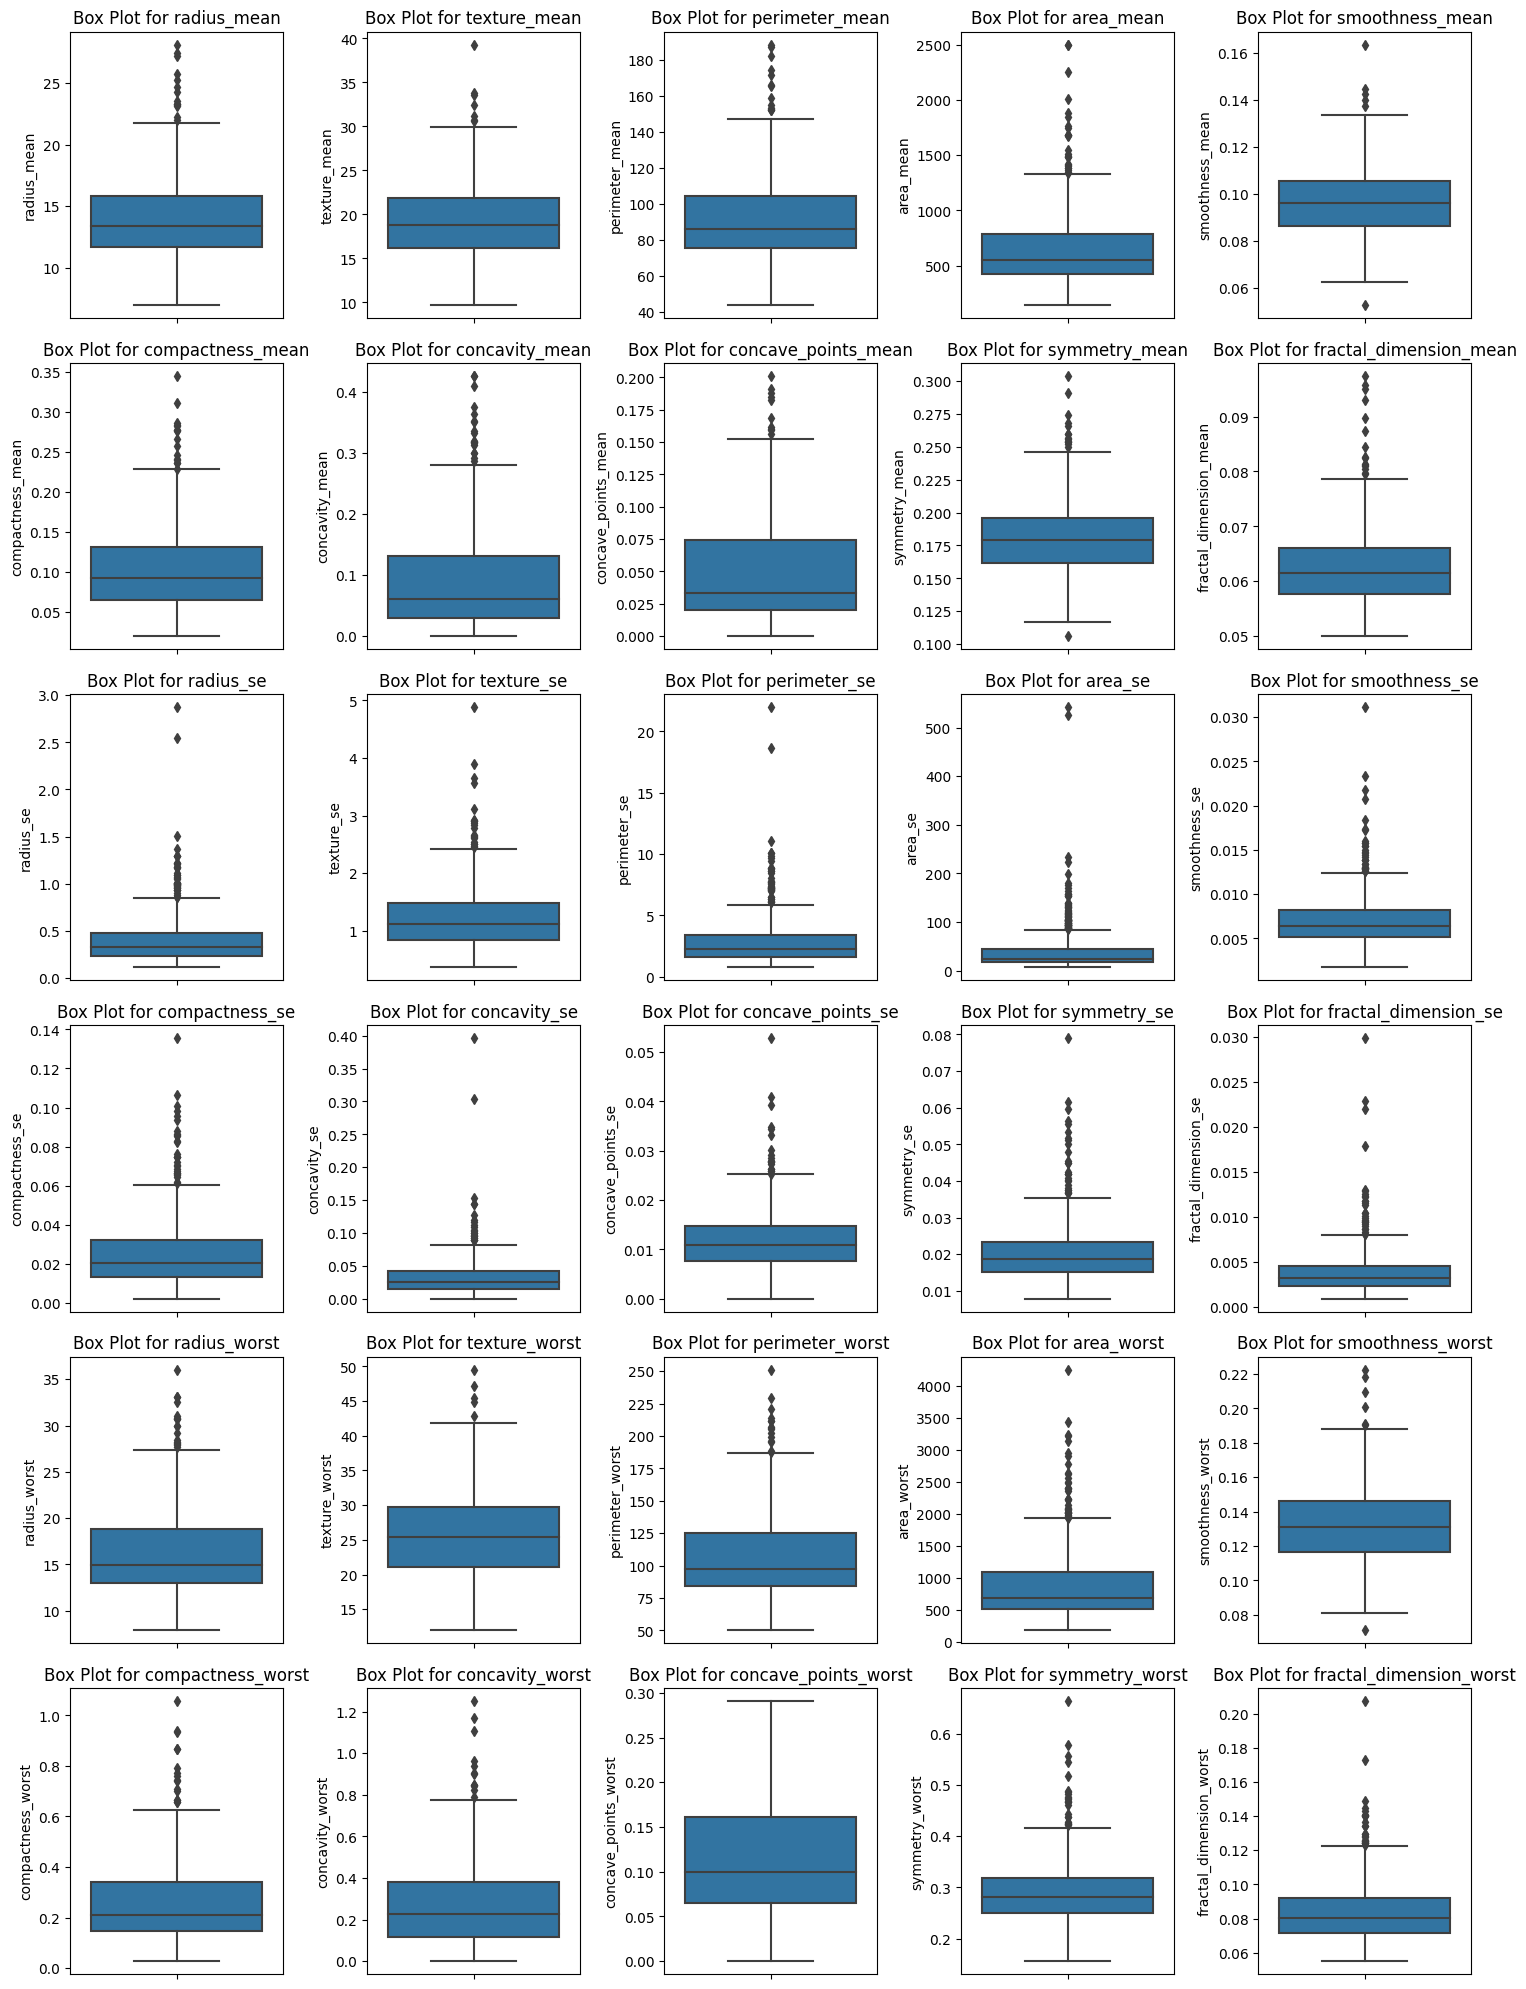

In [ ]:
# Selecting all continuous variables for outlier detection
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Create individual horizontal box plots for each continuous variable

plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=bca[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


In [ ]:
outlier_threshold = 1.5
# Calculate the percentage of outliers for each column
outliers_percentage = ((bca[continuous_columns] < bca[continuous_columns].quantile(0.25) - outlier_threshold * (bca[continuous_columns].quantile(0.75) - bca[continuous_columns].quantile(0.25))) |
                       (bca[continuous_columns] > bca[continuous_columns].quantile(0.75) + outlier_threshold * (bca[continuous_columns].quantile(0.75) - bca[continuous_columns].quantile(0.25)))).mean() * 100

# Print the percentage of outliers for each column
print("Percentage of Outliers for Each Column:")
print(outliers_percentage)


Percentage of Outliers for Each Column:
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave_points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave_points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.81195

In [ ]:
# Calculate statistics for each continuous variable
statistics = []

for column in continuous_columns:
    q1 = bca[column].quantile(0.25)
    q3 = bca[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr

    min_value = bca[column].min()
    max_value = bca[column].max()

    statistics.append({
        'Variable': column,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Minimum Value': min_value,
        'Maximum Value': max_value
    })

# Create a DataFrame from the list of dictionaries
statistics_df = pd.DataFrame(statistics)

# Print the DataFrame
print(statistics_df)


                   Variable  Lower Bound  Upper Bound  Minimum Value  \
0               radius_mean     5.580000    21.900000       6.981000   
1              texture_mean     7.725000    30.245000       9.710000   
2            perimeter_mean    31.775000   147.495000      43.790000   
3                 area_mean  -123.300000  1326.300000     143.500000   
4           smoothness_mean     0.057975     0.133695       0.052630   
5          compactness_mean    -0.033300     0.228620       0.019380   
6            concavity_mean    -0.122150     0.282410       0.000000   
7       concave_points_mean    -0.060225     0.154535       0.000000   
8             symmetry_mean     0.111200     0.246400       0.106000   
9    fractal_dimension_mean     0.045070     0.078750       0.049960   
10                radius_se    -0.137350     0.848650       0.111500   
11               texture_se    -0.126250     2.434150       0.360200   
12             perimeter_se    -1.020500     5.983500       0.75

In [ ]:
statistics_df = pd.DataFrame(statistics)

# Print the DataFrame
print(statistics_df)

# Save the DataFrame to a CSV file
statistics_df.to_csv('/content/statistics.csv', index=False)

                   Variable  Lower Bound  Upper Bound  Minimum Value  \
0               radius_mean     5.580000    21.900000       6.981000   
1              texture_mean     7.725000    30.245000       9.710000   
2            perimeter_mean    31.775000   147.495000      43.790000   
3                 area_mean  -123.300000  1326.300000     143.500000   
4           smoothness_mean     0.057975     0.133695       0.052630   
5          compactness_mean    -0.033300     0.228620       0.019380   
6            concavity_mean    -0.122150     0.282410       0.000000   
7       concave_points_mean    -0.060225     0.154535       0.000000   
8             symmetry_mean     0.111200     0.246400       0.106000   
9    fractal_dimension_mean     0.045070     0.078750       0.049960   
10                radius_se    -0.137350     0.848650       0.111500   
11               texture_se    -0.126250     2.434150       0.360200   
12             perimeter_se    -1.020500     5.983500       0.75

In [ ]:
print (bca)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1        17.99         10.38          122.80     1001.0   
1      2        20.57         17.77          132.90     1326.0   
2      3        19.69         21.25          130.00     1203.0   
3      4        11.42         20.38           77.58      386.1   
4      5        20.29         14.34          135.10     1297.0   
..   ...          ...           ...             ...        ...   
564  565        21.56         22.39          142.00     1479.0   
565  566        20.13         28.25          131.20     1261.0   
566  567        16.60         28.08          108.30      858.1   
567  568        20.60         29.33          140.10     1265.0   
568  569         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.

In [ ]:
# Selecting some continuous variables for normality check
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Check normality using the Shapiro-Wilk test
for column in continuous_columns:
    stat, p_value = shapiro(bca[column])
    print(f"Shapiro-Wilk test for {column}: Statistic={stat:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk test for radius_mean: Statistic=0.9411, p-value=0.0000
Shapiro-Wilk test for texture_mean: Statistic=0.9767, p-value=0.0000
Shapiro-Wilk test for perimeter_mean: Statistic=0.9362, p-value=0.0000
Shapiro-Wilk test for area_mean: Statistic=0.8584, p-value=0.0000
Shapiro-Wilk test for smoothness_mean: Statistic=0.9875, p-value=0.0001
Shapiro-Wilk test for compactness_mean: Statistic=0.9170, p-value=0.0000
Shapiro-Wilk test for concavity_mean: Statistic=0.8668, p-value=0.0000
Shapiro-Wilk test for concave_points_mean: Statistic=0.8916, p-value=0.0000
Shapiro-Wilk test for symmetry_mean: Statistic=0.9726, p-value=0.0000
Shapiro-Wilk test for fractal_dimension_mean: Statistic=0.9233, p-value=0.0000
Shapiro-Wilk test for radius_se: Statistic=0.7456, p-value=0.0000
Shapiro-Wilk test for texture_se: Statistic=0.8962, p-value=0.0000
Shapiro-Wilk test for perimeter_se: Statistic=0.7182, p-value=0.0000
Shapiro-Wilk test for area_se: Statistic=0.5638, p-value=0.0000
Shapiro-Wilk test f

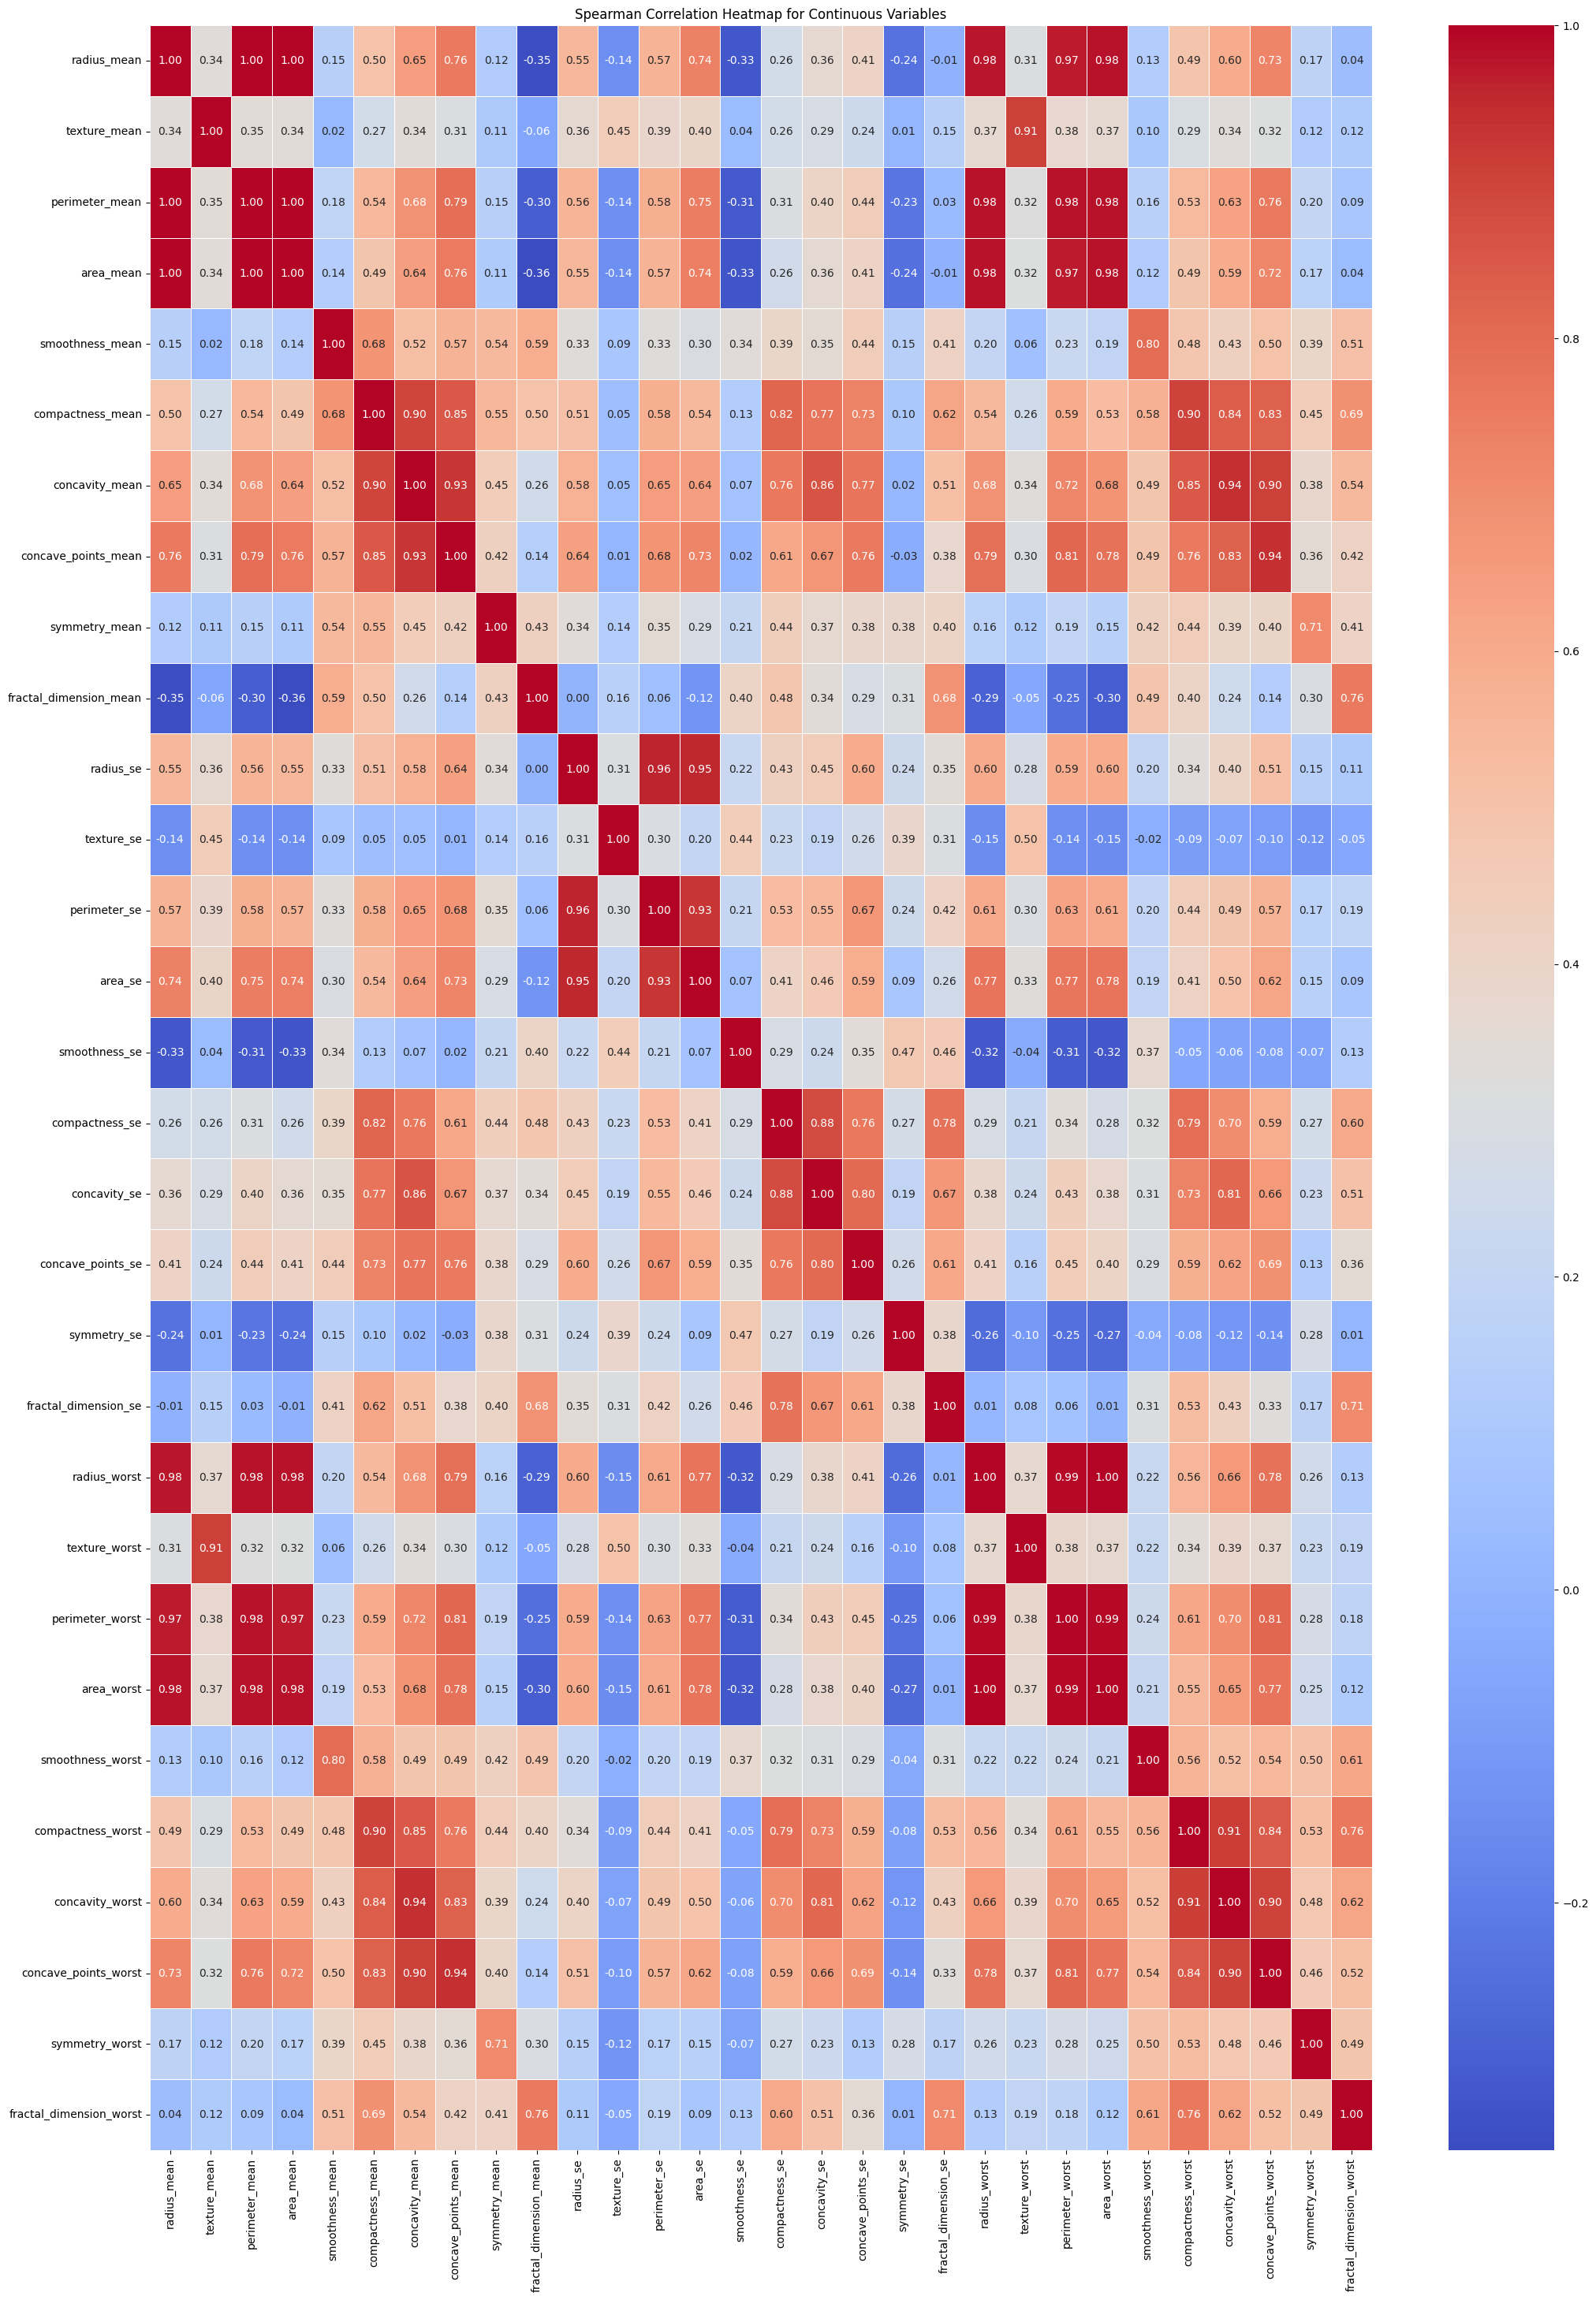

In [ ]:
# Selecting continuous variables for multicollinearity check
continuous_columns = [ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Calculate the Spearman correlation matrix
correlation_matrix = bca[continuous_columns].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(25, 35))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap for Continuous Variables')
plt.show()


In [ ]:
print (bca)

     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1        17.99         10.38          122.80     1001.0   
1      2        20.57         17.77          132.90     1326.0   
2      3        19.69         21.25          130.00     1203.0   
3      4        11.42         20.38           77.58      386.1   
4      5        20.29         14.34          135.10     1297.0   
..   ...          ...           ...             ...        ...   
564  565        21.56         22.39          142.00     1479.0   
565  566        20.13         28.25          131.20     1261.0   
566  567        16.60         28.08          108.30      858.1   
567  568        20.60         29.33          140.10     1265.0   
568  569         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.

OUTLIERS CORRECTION

In [ ]:
# Create a copy of the original DataFrame
bca_corrected = bca.copy()

# Specify the range of columns you want to process (e.g., columns 2 to 31)
start_column = 1
end_column = 31

# Iterate over each variable in columns start_column to end_column
for column in bca_corrected.columns[start_column:end_column + 1]:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(bca_corrected[column]):
        q1, q3 = bca_corrected[column].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Replace values above the upper bound with the upper bound value
        bca_corrected[column] = np.where(bca_corrected[column] > upper_bound, upper_bound, bca_corrected[column])

        # Replace values below the lower bound with the lower bound value
        bca_corrected[column] = np.where(bca_corrected[column] < lower_bound, lower_bound, bca_corrected[column])




In [ ]:
# Save the corrected DataFrame to a CSV file
csv_filename_corrected = '/content/bca_corrected.csv'
bca_corrected.to_csv(csv_filename_corrected, index=False)

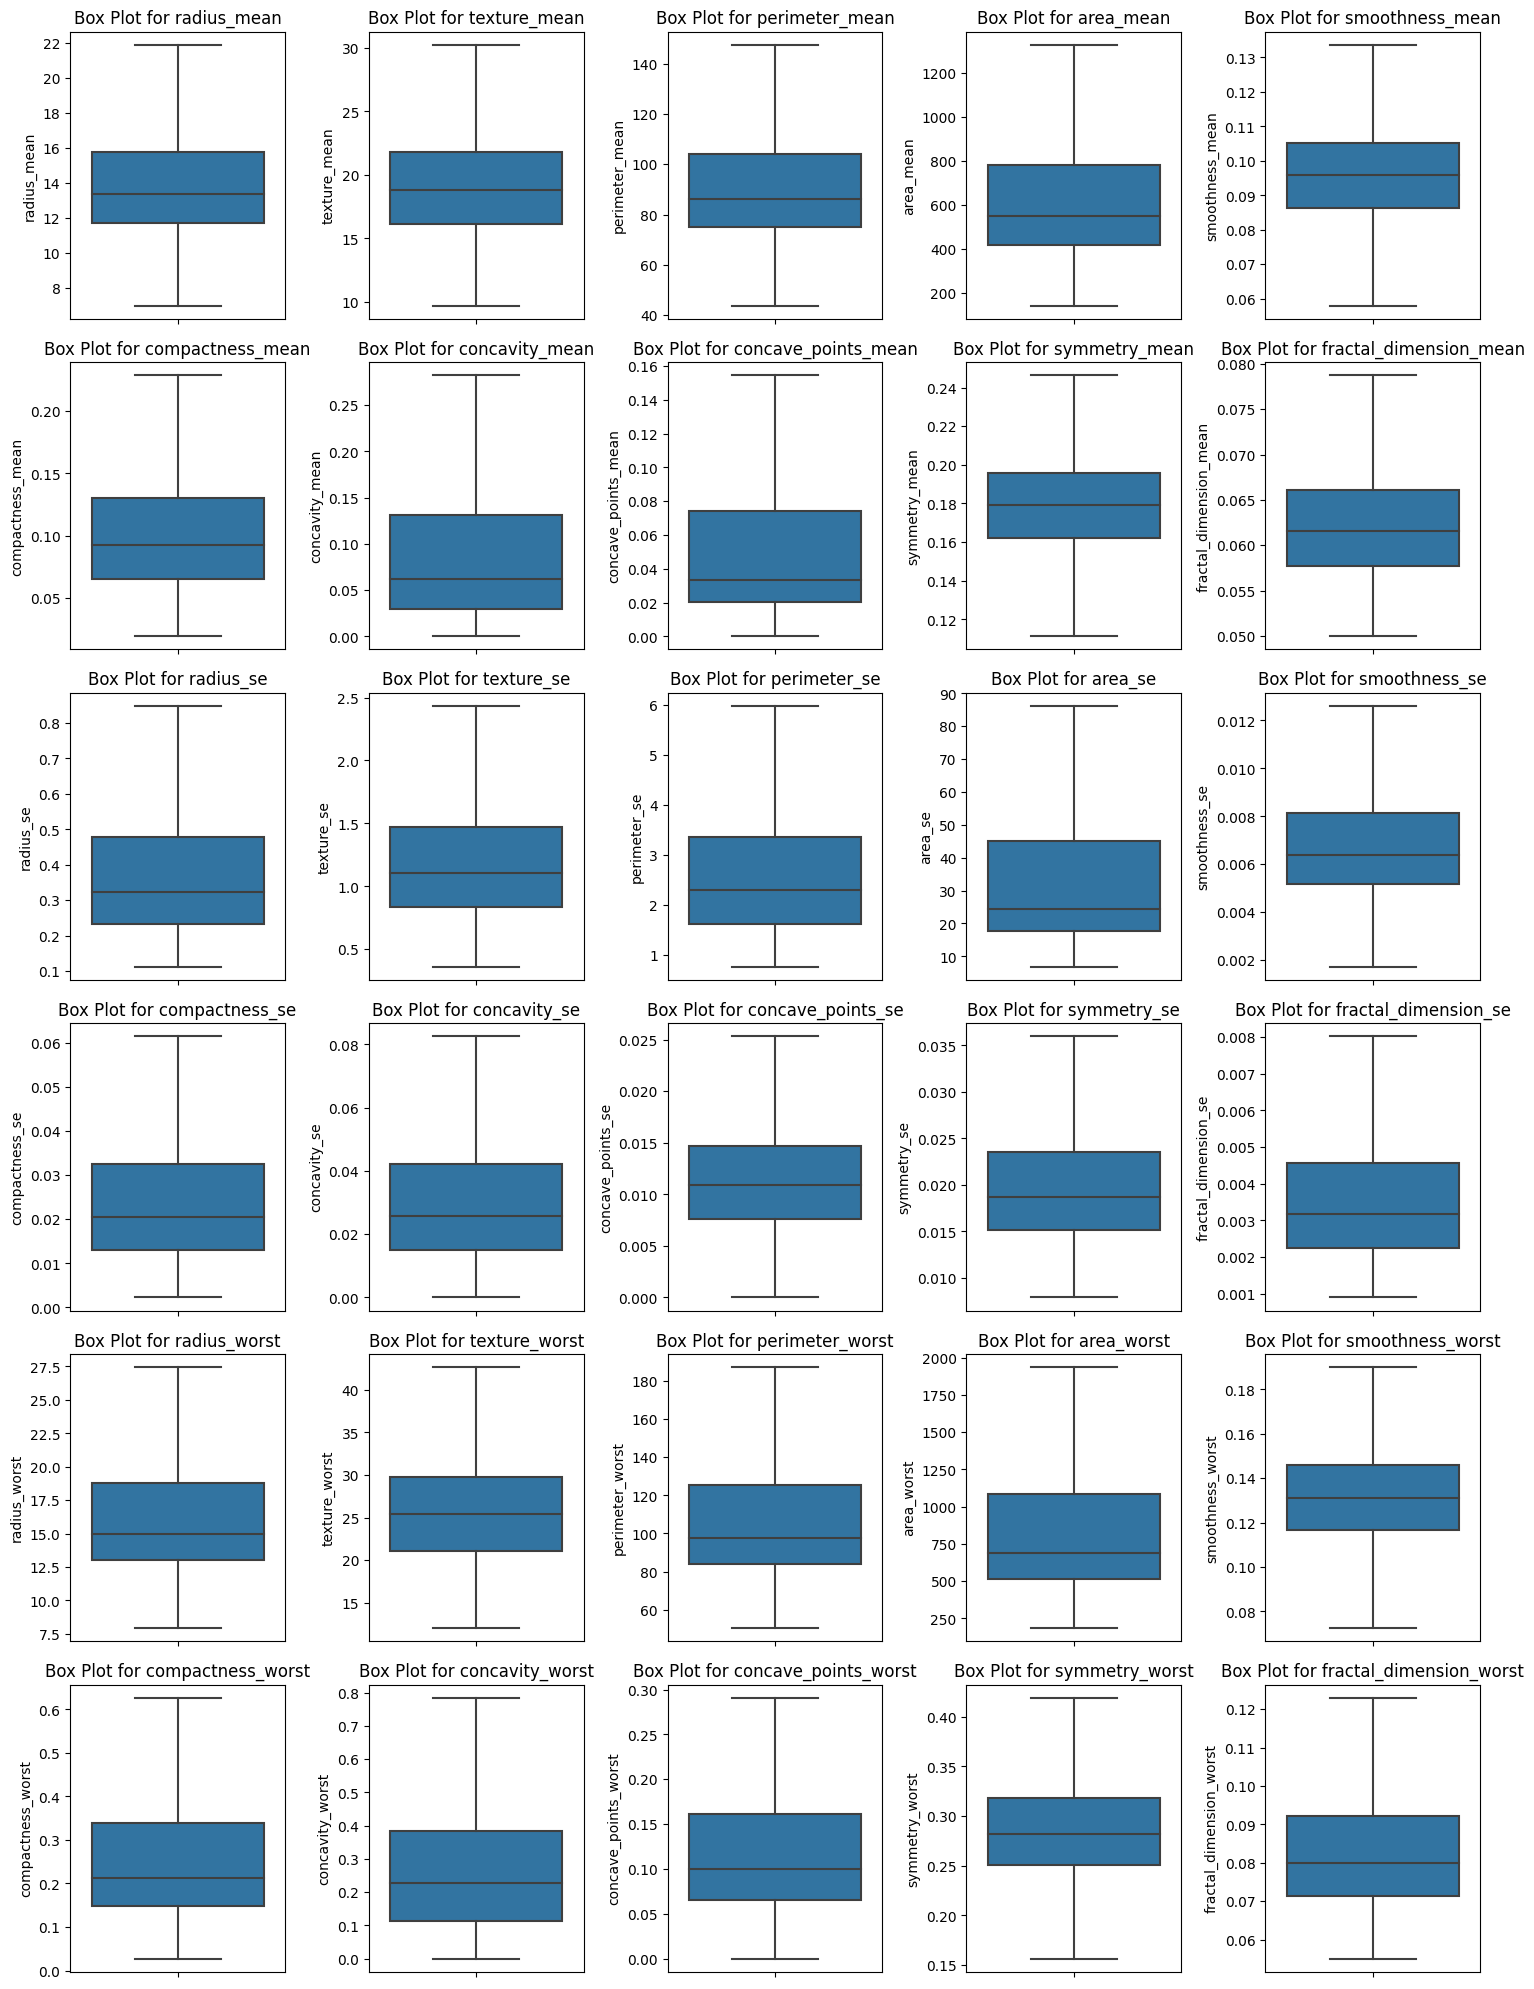

In [ ]:
# Confirm outliar correction
# Create individual box plots for each continuous variable in the corrected DataFrame

plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=bca_corrected[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


DATA SCALLING

In [ ]:

# Create a copy of the DataFrame for feature scaling
bca_scale = bca_corrected.copy()

# Select only the numeric columns for feature scaling
numeric_columns = bca_scale.select_dtypes(include='number').columns
columns_to_scale = numeric_columns[start_column:end_column + 1]

# Instantiate StandardScaler
scaler = StandardScaler()

# Perform feature scaling on selected columns
bca_scale[columns_to_scale] = scaler.fit_transform(bca_scale[columns_to_scale])


In [ ]:
print(bca_scale)
# Save the scaled DataFrame to a CSV file
csv_filename_scaled = '/content/bca_scale.csv'
bca_scale.to_csv(csv_filename_scaled, index=False)


     PID  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      1     1.176800     -2.121200        1.357375   1.184085   
1      2     1.949929     -0.354875        1.795991   2.249396   
2      3     1.686226      0.476899        1.670052   1.846217   
3      4    -0.791983      0.268955       -0.606410  -0.831485   
4      5     1.866023     -1.174698        1.891531   2.154338   
..   ...          ...           ...             ...        ...   
564  565     2.246595      0.749377        2.191180   2.250380   
565  566     1.818077      2.150007        1.722165   2.036334   
566  567     0.760269      2.109375        0.727678   0.715676   
567  568     1.958919      2.408144        2.108668   2.049446   
568  569    -1.888747      1.263260       -1.894466  -1.503778   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           1.618861          2.541404        2.647422             2.620973   
1          -0.842995         -0.498189       -0.0

SMOTE

In [ ]:
# Print the column names of the DataFrame
print(bca_corrected.columns)


Index(['PID', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'malignant_mass', 'dx'],
      dtype='object')


SPLITTING DATA

In [ ]:
# Selecting features (X) and target variable (y)
X = bca.drop(columns=['Diagnosis'])
y = bca['Diagnosis']



In [ ]:
# Define X (features) and y (target variable)
X = bca.drop(columns=['Diagnosis'])
y = bca['Diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate X and y for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [ ]:
# Save training and testing sets to CSV files in Colab
train_data.to_csv('/content/train_data.csv', index=False)
test_data.to_csv('/content/test_data.csv', index=False)

In [ ]:
print (test_data)